In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols as sfm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from matplotlib import pyplot as plt
import seaborn as sns


## Data Preprocessing

In [2]:
dir = os.getcwd()
parent_dir = os.path.join(dir, "..")
data_path = os.path.join(parent_dir, "data")
file_path = os.path.join(data_path, "summary_redfin.csv")
house_df = pd.read_csv(file_path)
house_df

,url,type,price,sq_ft,price_per_sq_ft,latitude,longitude,beds,baths,address,...,avg_restaurant_price_level,avg_restaurant_rating,num_stores,num_schools,num_hospitals,num_crimes,violent_crime_count,nonviolent_crime_count,most_prevalent_crime,crime_proportion
0,https://redfin.com/IL/Chicago/155-N-Harbor-Dr-...,for_sale,465000.0,998.0,466.000000,41.884895,-87.615398,1.0,1.5,"155 N Harbor Dr #4004, Chicago, IL 60601",...,2.000000,3.972549,19,35,20,3121,734,2340,THEFT,0.404998
1,https://redfin.com/IL/Chicago/222-N-Columbus-D...,for_sale,289000.0,611.0,473.000000,41.886684,-87.621214,1.0,1.0,"222 N Columbus Dr #2304, Chicago, IL 60601",...,2.153061,4.232710,43,59,47,8592,2105,6303,THEFT,0.437849
2,https://redfin.com/IL/Chicago/363-E-Wacker-Dr-...,for_sale,1950000.0,2260.0,863.000000,41.887451,-87.617460,2.0,2.5,"363 E Wacker Dr #3103, Chicago, IL 60601",...,2.013699,4.074713,25,39,46,5873,1452,4307,THEFT,0.423804
3,https://redfin.com/IL/Chicago/200-N-Dearborn-S...,for_sale,255000.0,775.0,329.000000,41.886088,-87.630010,1.0,1.0,"200 N Dearborn St #4608, Chicago, IL 60601",...,1.958621,4.207895,67,68,27,10517,2482,7724,THEFT,0.425977
4,https://redfin.com/IL/Chicago/400-E-Randolph-S...,for_sale,389000.0,650.0,598.000000,41.885003,-87.616864,0.0,1.0,"400 E Randolph St #1811, Chicago, IL 60601",...,2.035714,4.139394,23,38,24,5222,1155,3987,THEFT,0.476637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,https://redfin.com/IL/Chicago/2948-S-Lyman-St-...,for_sale,438000.0,1400.0,313.000000,41.840801,-87.654176,4.0,2.0,"2948 S Lyman St, Chicago, IL 60608",...,1.542857,4.164286,8,11,0,900,327,559,THEFT,0.211111
4065,https://redfin.com/IL/Chicago/757-N-Orleans-St...,for_sale,409990.0,983.0,417.000000,41.896301,-87.636563,1.0,1.0,"757 N Orleans St #1303, Chicago, IL 60654",...,2.061404,4.260345,41,44,5,5937,1707,4114,THEFT,0.360451
4066,https://redfin.com/IL/Chicago/474-N-Lake-Shore...,for_sale,275000.0,741.0,371.000000,41.890837,-87.614590,1.0,1.0,"474 N Lake Shore Dr #3404, Chicago, IL 60611",...,2.000000,4.002778,14,23,43,3460,868,2557,THEFT,0.421965
4067,https://redfin.com/IL/Chicago/353-W-Chicago-Av...,for_sale,799995.0,NaN,461.876238,41.896348,-87.637744,3.0,3.0,"353 W Chicago Ave Unit 4E, Chicago, IL 60654",...,2.000000,4.276923,39,44,6,5297,1495,3711,THEFT,0.358505


In [3]:
house_df.shape

(4069, 33)

In [4]:
house_df.isna().sum()

url                              0
type                             0
price                            0
sq_ft                         1140
price_per_sq_ft                 17
latitude                        37
longitude                       37
beds                             2
baths                           15
address                         35
tags                           956
year_built                     350
property_type                   14
amenities.hoa_dues            2092
amenities.community             35
amenities.county                 0
amenities.built                349
amenities.property_type          0
amenities.heating_cooling     1536
amenities.laundry             1961
amenities.parking              946
amenities.lot_size            2432
num_restaurants                  0
avg_restaurant_price_level      52
avg_restaurant_rating           52
num_stores                       0
num_schools                      0
num_hospitals                    0
num_crimes          

In [5]:
house_df.dropna(subset=['price', 'price_per_sq_ft', 'longitude', 'latitude', 'avg_restaurant_price_level', 'avg_restaurant_rating'], inplace=True)
print(house_df.isna().sum())
print("Shape of dataframe after dropping NAs:", house_df.shape)

url                              0
type                             0
price                            0
sq_ft                         1123
price_per_sq_ft                  0
latitude                         0
longitude                        0
beds                             2
baths                           15
address                          0
tags                           934
year_built                     345
property_type                   14
amenities.hoa_dues            2050
amenities.community              0
amenities.county                 0
amenities.built                344
amenities.property_type          0
amenities.heating_cooling     1503
amenities.laundry             1922
amenities.parking              933
amenities.lot_size            2410
num_restaurants                  0
avg_restaurant_price_level       0
avg_restaurant_rating            0
num_stores                       0
num_schools                      0
num_hospitals                    0
num_crimes          

In [6]:
# Feature Space
## list of numeric cols
numerical_cols = house_df.select_dtypes(include = np.number).columns.tolist()

## list of categorical cols
categorical_cols = house_df.select_dtypes(exclude = np.number).columns.tolist()

print(f"Numeric Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")
print(f"Number of numeric columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

Numeric Columns: ['price', 'sq_ft', 'price_per_sq_ft', 'latitude', 'longitude', 'beds', 'baths', 'year_built', 'num_restaurants', 'avg_restaurant_price_level', 'avg_restaurant_rating', 'num_stores', 'num_schools', 'num_hospitals', 'num_crimes', 'violent_crime_count', 'nonviolent_crime_count', 'crime_proportion']
Categorical Columns: ['url', 'type', 'address', 'tags', 'property_type', 'amenities.hoa_dues', 'amenities.community', 'amenities.county', 'amenities.built', 'amenities.property_type', 'amenities.heating_cooling', 'amenities.laundry', 'amenities.parking', 'amenities.lot_size', 'most_prevalent_crime']
Number of numeric columns: 18
Number of categorical columns: 15


In [7]:
house_df[categorical_cols].astype('category')
house_df[numerical_cols].astype('float')

,price,sq_ft,price_per_sq_ft,latitude,longitude,beds,baths,year_built,num_restaurants,avg_restaurant_price_level,avg_restaurant_rating,num_stores,num_schools,num_hospitals,num_crimes,violent_crime_count,nonviolent_crime_count,crime_proportion
0,465000.0,998.0,466.000000,41.884895,-87.615398,1.0,1.5,1974.0,51.0,2.000000,3.972549,19.0,35.0,20.0,3121.0,734.0,2340.0,0.404998
1,289000.0,611.0,473.000000,41.886684,-87.621214,1.0,1.0,2002.0,107.0,2.153061,4.232710,43.0,59.0,47.0,8592.0,2105.0,6303.0,0.437849
2,1950000.0,2260.0,863.000000,41.887451,-87.617460,2.0,2.5,2021.0,87.0,2.013699,4.074713,25.0,39.0,46.0,5873.0,1452.0,4307.0,0.423804
3,255000.0,775.0,329.000000,41.886088,-87.630010,1.0,1.0,1989.0,153.0,1.958621,4.207895,67.0,68.0,27.0,10517.0,2482.0,7724.0,0.425977
4,389000.0,650.0,598.000000,41.885003,-87.616864,0.0,1.0,1963.0,66.0,2.035714,4.139394,23.0,38.0,24.0,5222.0,1155.0,3987.0,0.476637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,438000.0,1400.0,313.000000,41.840801,-87.654176,4.0,2.0,1885.0,44.0,1.542857,4.164286,8.0,11.0,0.0,900.0,327.0,559.0,0.211111
4065,409990.0,983.0,417.000000,41.896301,-87.636563,1.0,1.0,2008.0,117.0,2.061404,4.260345,41.0,44.0,5.0,5937.0,1707.0,4114.0,0.360451
4066,275000.0,741.0,371.000000,41.890837,-87.614590,1.0,1.0,1991.0,72.0,2.000000,4.002778,14.0,23.0,43.0,3460.0,868.0,2557.0,0.421965
4067,799995.0,NaN,461.876238,41.896348,-87.637744,3.0,3.0,1920.0,92.0,2.000000,4.276923,39.0,44.0,6.0,5297.0,1495.0,3711.0,0.358505


Summary statistics for the dataframe

In [8]:
house_df.describe()

,price,sq_ft,price_per_sq_ft,latitude,longitude,beds,baths,year_built,num_restaurants,avg_restaurant_price_level,avg_restaurant_rating,num_stores,num_schools,num_hospitals,num_crimes,violent_crime_count,nonviolent_crime_count,crime_proportion
count,4.016000e+03,2893.000000,4016.000000,4016.000000,4016.000000,4014.000000,4001.000000,3671.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,6.358996e+05,2003.716903,293.851027,41.850074,-87.650543,3.860239,2.571982,1953.884500,56.256723,1.573533,4.136245,14.865787,21.879731,7.016185,2797.957171,872.012948,1856.636952,0.292002
std,8.893689e+05,2575.099775,179.511409,0.084626,0.052587,3.994720,2.413828,45.910258,40.293482,0.279808,0.176745,13.374281,16.775604,14.027743,2143.453042,558.246237,1591.331861,0.090891
min,1.750000e+03,372.000000,1.000000,41.634563,-87.844916,0.000000,1.000000,1228.000000,1.000000,1.000000,2.831250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000e+05,1050.000000,160.000000,41.776479,-87.678649,2.000000,1.500000,1914.000000,21.000000,1.363636,4.018434,6.000000,10.000000,0.000000,1438.750000,482.750000,867.750000,0.213559
50%,3.650000e+05,1414.000000,260.383333,41.876804,-87.638337,3.000000,2.000000,1955.000000,50.000000,1.518188,4.176883,11.000000,17.000000,0.000000,2288.500000,759.000000,1377.000000,0.259669
75%,6.500000e+05,2200.000000,384.100000,41.903496,-87.620688,5.000000,3.000000,2001.000000,81.000000,1.750000,4.261116,19.000000,29.000000,5.000000,3290.000000,1139.000000,2094.250000,0.377173
max,2.100000e+07,66000.000000,1409.000000,42.021796,-87.528950,75.000000,53.000000,2026.000000,176.000000,2.178295,4.600000,67.000000,94.000000,60.000000,11062.000000,2659.000000,8180.000000,1.000000


A peek at the variables of interest

In [9]:
col = ['price_per_sq_ft', 'num_crimes', 'num_restaurants', 'avg_restaurant_price_level', 'avg_restaurant_rating',
       'num_stores', 'num_schools', 'num_hospitals']
house_df[col].head()

,price_per_sq_ft,num_crimes,num_restaurants,avg_restaurant_price_level,avg_restaurant_rating,num_stores,num_schools,num_hospitals
0,466.0,3121,51,2.000000,3.972549,19,35,20
1,473.0,8592,107,2.153061,4.232710,43,59,47
2,863.0,5873,87,2.013699,4.074713,25,39,46
3,329.0,10517,153,1.958621,4.207895,67,68,27
4,598.0,5222,66,2.035714,4.139394,23,38,24


## Distribution

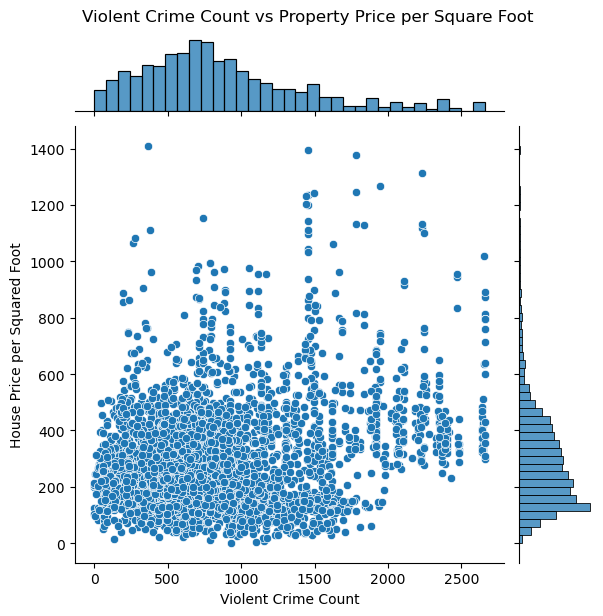

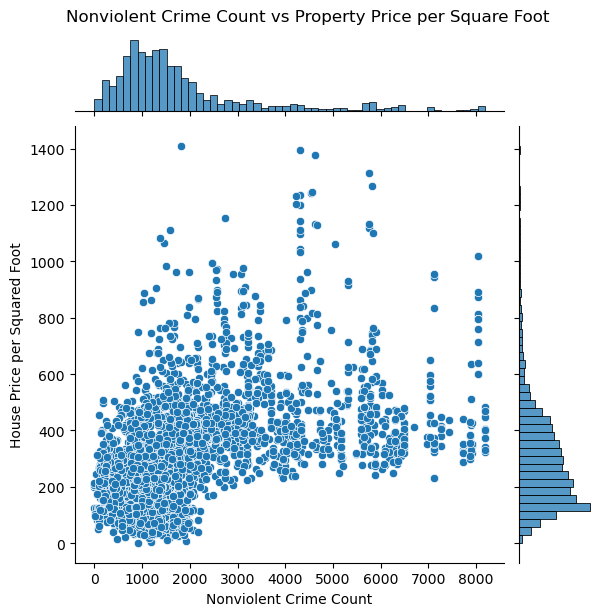

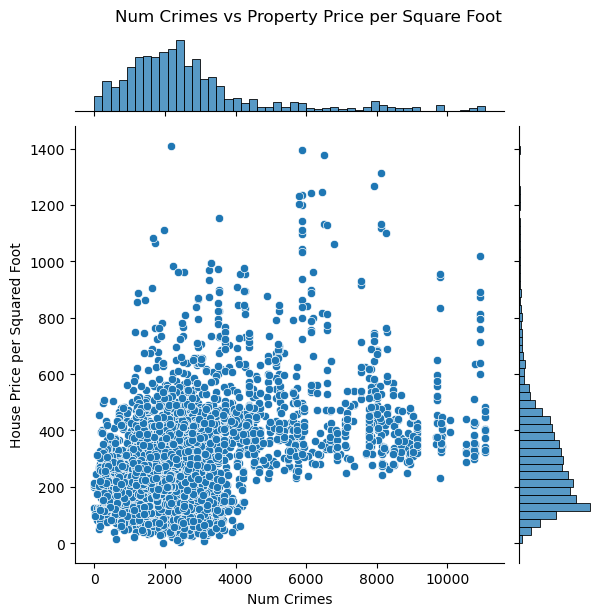

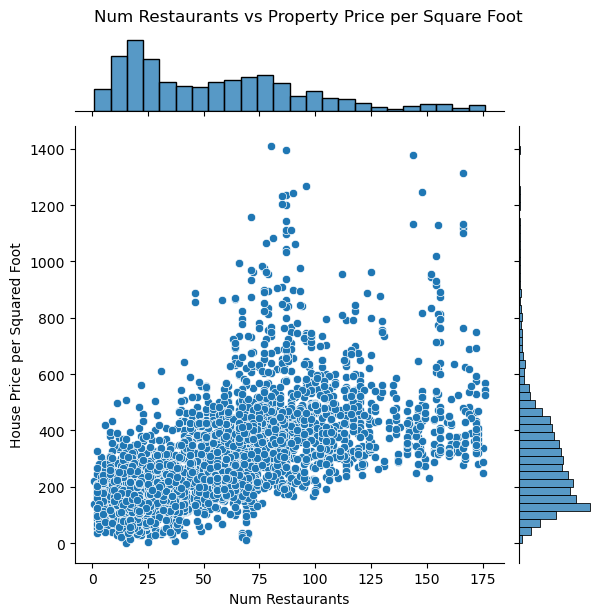

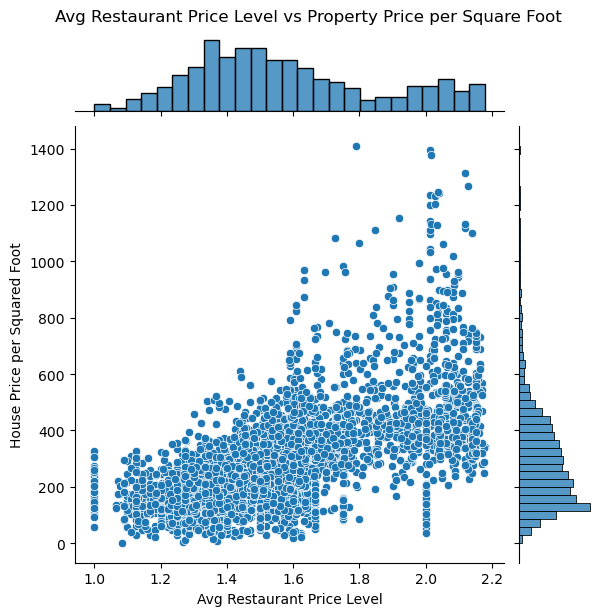

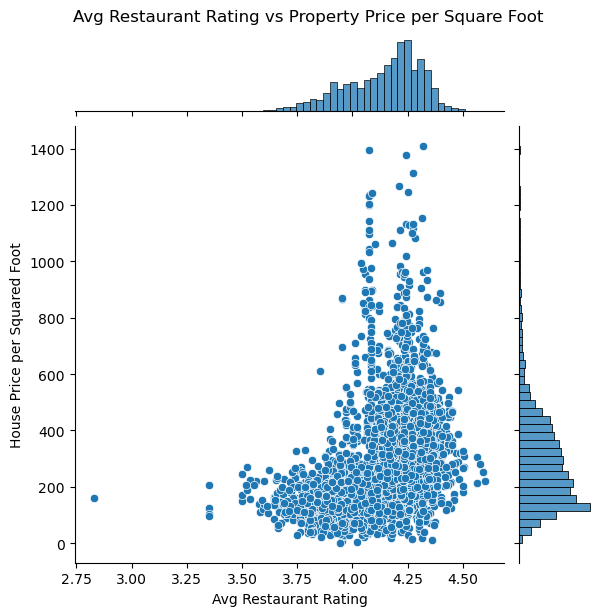

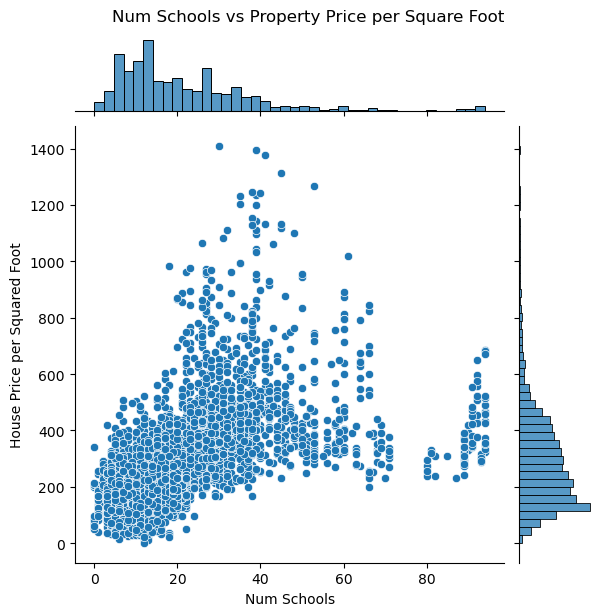

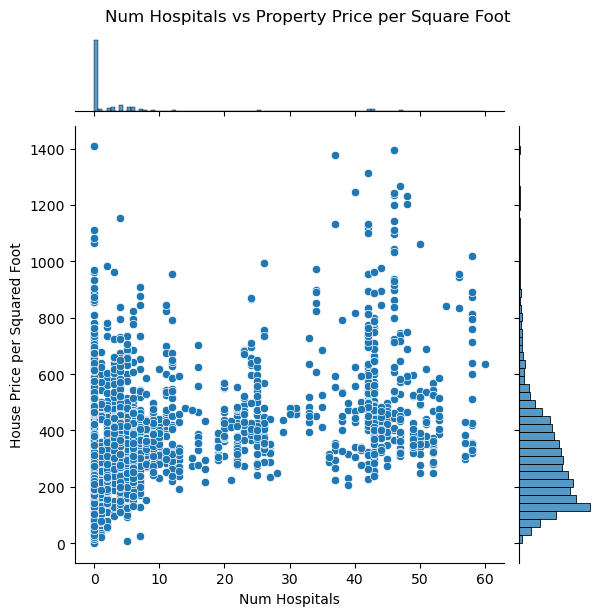

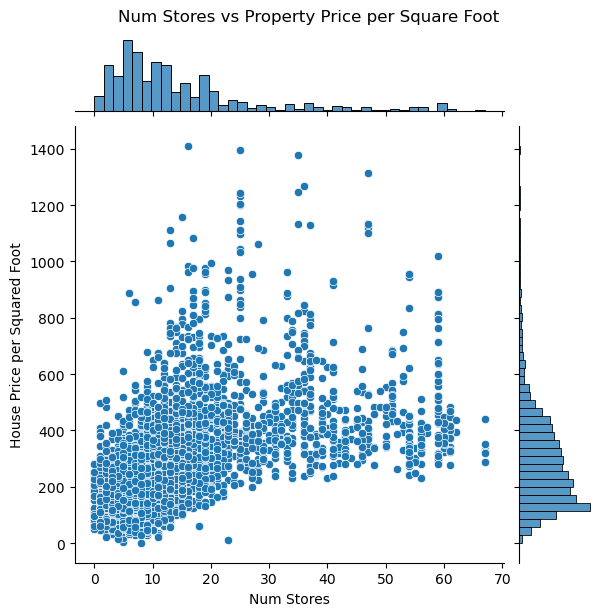

In [10]:
features = ["violent_crime_count", "nonviolent_crime_count", "num_crimes", "num_restaurants", "avg_restaurant_price_level", "avg_restaurant_rating", "num_schools", "num_hospitals", "num_stores"]
for column in features:
    g = sns.jointplot(data=house_df, x=column, y="price_per_sq_ft")
    
    # Set title using suptitle since jointplot creates its own figure
    g.figure.suptitle(f"{column.replace('_', ' ').title()} vs Property Price per Square Foot", y=1.02)

    # Set axis labels
    g.set_axis_labels(column.replace('_', ' ').title(), "House Price per Squared Foot")

    plt.show()

In [11]:
for f in features:
    print(f, house_df[f].skew())
np.log(house_df['price_per_sq_ft']).skew()

violent_crime_count 0.9930739885916524
nonviolent_crime_count 1.865985745469739
num_crimes 1.7357696094767572
num_restaurants 0.8475344201758581
avg_restaurant_price_level 0.4858351406314972
avg_restaurant_rating -0.8256312143719399
num_schools 1.775592433799187
num_hospitals 2.2070093513422893
num_stores 1.7477672202423027


-0.6663882531947226

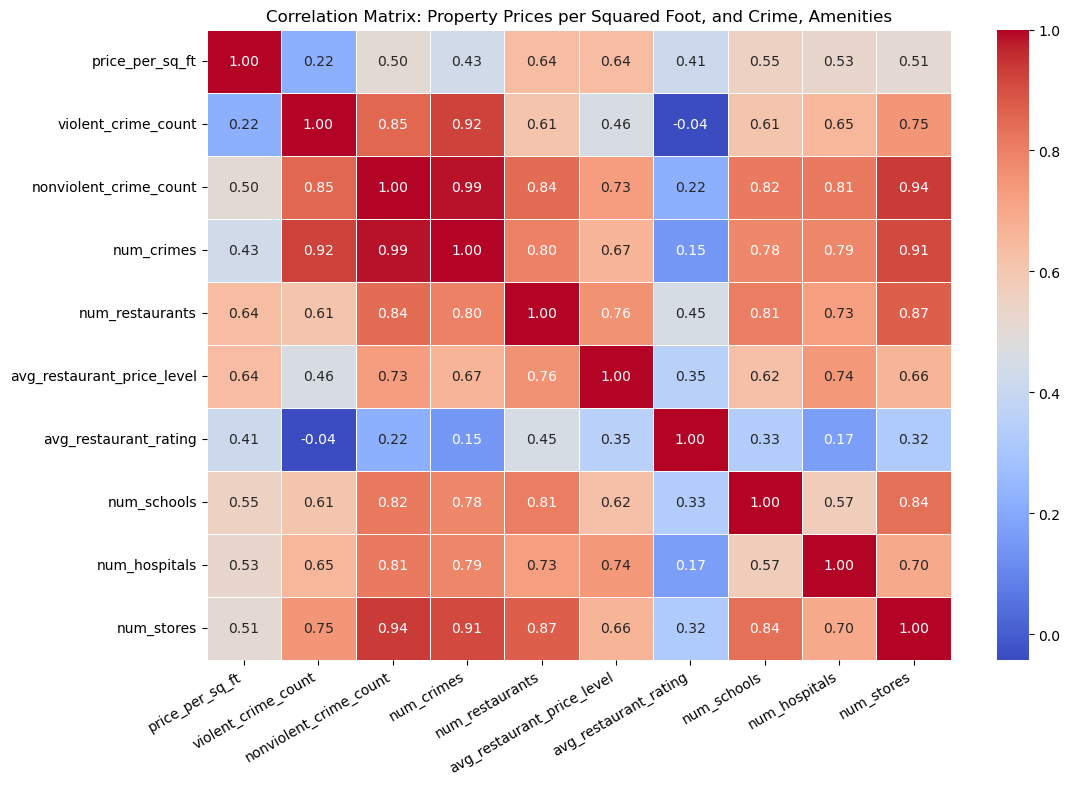

In [12]:
features = ['price_per_sq_ft'] + features
corr_matrix = house_df[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=30, ha="right") 
plt.yticks(rotation=0)  
plt.subplots_adjust(bottom=0.25)  
plt.title("Correlation Matrix: Property Prices per Squared Foot, and Crime, Amenities")
plt.show()

## Transformation

In [13]:
# log transformation for price
house_df['log_price_per_sqft'] = np.log(house_df['price_per_sq_ft'])
print('price_per_sqft', house_df['price_per_sq_ft'].skew())
print('log_price_per_sqft', house_df['log_price_per_sqft'].skew())
print('----------------------')

#sqrt transformation columns
cols_to_sqrt = [
    'violent_crime_count',
    'nonviolent_crime_count',
    'num_crimes',
    'num_restaurants',
    'num_stores',
    'num_schools',
    'num_hospitals'
]

for col in cols_to_sqrt:
    house_df['sqrt_' + col] = np.sqrt(house_df[col])
    print('sqrt_' + col, house_df['sqrt_' + col].skew())

price_per_sqft 1.5986486895067495
log_price_per_sqft -0.6663882531947226
----------------------
sqrt_violent_crime_count 0.08640042634588044
sqrt_nonviolent_crime_count 0.9296323932295742
sqrt_num_crimes 0.7013621965927826
sqrt_num_restaurants 0.19743482075002639
sqrt_num_stores 0.7795262642083648
sqrt_num_schools 0.6486853180673539
sqrt_num_hospitals 1.41972948910879


Below is the skewness after log transformation for all variables

In [14]:
cols = [
    'violent_crime_count',
    'nonviolent_crime_count',
    'num_crimes',
    'num_restaurants',
    'num_stores',
    'num_schools',
    'num_hospitals'
]

for col in cols:
    house_df['log_' + col] = np.log1p(house_df[col])
    print('log_' + col, house_df['log_' + col].skew())

log_violent_crime_count -1.800825701995858
log_nonviolent_crime_count -1.1568554652687817
log_num_crimes -1.6719114239243467
log_num_restaurants -0.5401606829412559
log_num_stores -0.13622353419647007
log_num_schools -0.350698561304918
log_num_hospitals 1.0268061008290874


As we can see, log makes some of the variables more left skewed. As the skewness is moderate, we will proceed with square root transformation for the count data (negative count does not make much sense realistically speaking). For price though, log transformation makes sense and the final skewness is acceptable.

In [15]:
features = ["log_price_per_sqft", "sqrt_num_crimes", "sqrt_num_restaurants", "avg_restaurant_price_level", "avg_restaurant_rating", "sqrt_num_schools", "sqrt_num_hospitals", "sqrt_num_stores"]
house_df[features].describe(include='all')

,log_price_per_sqft,sqrt_num_crimes,sqrt_num_restaurants,avg_restaurant_price_level,avg_restaurant_rating,sqrt_num_schools,sqrt_num_hospitals,sqrt_num_stores
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,5.500476,49.532918,6.989469,1.573533,4.136245,4.374235,1.481127,3.523064
std,0.636445,18.561600,2.721376,0.279808,0.176745,1.657253,2.196281,1.566659
min,0.000000,0.000000,1.000000,1.000000,2.831250,0.000000,0.000000,0.000000
25%,5.075174,37.930858,4.582576,1.363636,4.018434,3.162278,0.000000,2.449490
50%,5.562155,47.838269,7.071068,1.518188,4.176883,4.123106,0.000000,3.316625
75%,5.950903,57.358522,9.000000,1.750000,4.261116,5.385165,2.236068,4.358899
max,7.250636,105.176043,13.266499,2.178295,4.600000,9.695360,7.745967,8.185353


In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map centered at the average location of your houses
m = folium.Map(location=[house_df['latitude'].mean(), house_df['longitude'].mean()], zoom_start=12)

# Create a heatmap layer for restaurants
restaurants_layer = folium.FeatureGroup(name='Restaurants')
heat_data_rest = [[row['latitude'], row['longitude'], row['num_restaurants']] for index, row in house_df.iterrows()]
HeatMap(heat_data_rest, radius=15, blur=10, max_zoom=1).add_to(restaurants_layer)
restaurants_layer.add_to(m)

# Create a heatmap layer for schools
schools_layer = folium.FeatureGroup(name='Schools')
heat_data_schools = [[row['latitude'], row['longitude'], row['num_schools']] for index, row in house_df.iterrows()]
HeatMap(heat_data_schools, radius=15, blur=0, max_zoom=1).add_to(schools_layer)
schools_layer.add_to(m)


# Add layer control so you can toggle between different heatmaps
folium.LayerControl().add_to(m)

m
# Save the map as an HTML file
#m.save("amenities_heatmap.html")


Index(['const', 'num_crimes', 'num_restaurants', 'num_hospitals', 'num_stores',
       'num_schools', 'crimes_restaurants'],
      dtype='object')
   const  num_crimes  num_restaurants  num_hospitals  num_stores  num_schools  \
0      1    0.000000              1.0       7.016185   14.865787    21.879731   
1      1  225.755102              1.0       7.016185   14.865787    21.879731   
2      1  451.510204              1.0       7.016185   14.865787    21.879731   
3      1  677.265306              1.0       7.016185   14.865787    21.879731   
4      1  903.020408              1.0       7.016185   14.865787    21.879731   

   crimes_restaurants  
0            0.000000  
1          225.755102  
2          451.510204  
3          677.265306  
4          903.020408  


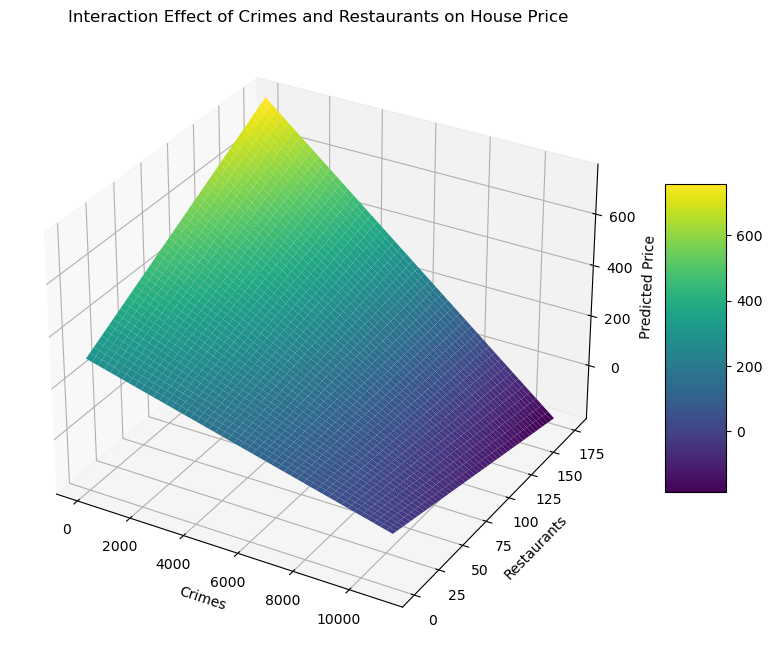

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm


house_df['crimes_restaurants'] = house_df['num_crimes'] * house_df['num_restaurants']

# Fit a regression model with the interaction term
X = house_df[['num_crimes', 'num_restaurants', 'num_hospitals', 'num_stores', 'num_schools', 'crimes_restaurants']]
y = house_df['price_per_sq_ft']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.params.index)

# Create a grid for num_crimes and num_restaurants
crime_vals = np.linspace(house_df['num_crimes'].min(), house_df['num_crimes'].max(), 50)
restaurant_vals = np.linspace(house_df['num_restaurants'].min(), house_df['num_restaurants'].max(), 50)
crime_grid, restaurant_grid = np.meshgrid(crime_vals, restaurant_vals)

# Use mean values for the other variables
hospitals_mean = house_df['num_hospitals'].mean()
stores_mean = house_df['num_stores'].mean()
schools_mean = house_df['num_schools'].mean()

# Create the DataFrame with the correct column names
grid_df = pd.DataFrame({
    'num_crimes': crime_grid.ravel(),
    'num_restaurants': restaurant_grid.ravel(),
    'num_hospitals': hospitals_mean,
    'num_stores': stores_mean,
    'num_schools': schools_mean,
})

# Add the interaction term
grid_df['crimes_restaurants'] = grid_df['num_crimes'] * grid_df['num_restaurants']

# Explicitly add a constant column
grid_df.insert(0, 'const', 1)

# Reorder the DataFrame columns to match the model parameters
expected_cols = ['const', 'num_crimes', 'num_restaurants', 'num_hospitals', 'num_stores', 'num_schools', 'crimes_restaurants']
grid_df = grid_df[expected_cols]

print(grid_df.head())

# Predict house prices using the model
grid_df['price'] = model.predict(grid_df)

# Reshape predictions to match the grid for plotting
price = grid_df['price'].values.reshape(crime_grid.shape)


# Plot a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(crime_grid, restaurant_grid, price, cmap='viridis', edgecolor='none')
ax.set_xlabel('Crimes')
ax.set_ylabel('Restaurants')
ax.set_zlabel('Predicted Price')
ax.set_title('Interaction Effect of Crimes and Restaurants on House Price')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [16]:
df = house_df.copy()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

mask = (df['price'] >= lower_bound) & (df['price'] <= upper_bound)
df = df[mask]

print(f"After outlier removal, the dataset shape: {df.shape}")

After outlier removal, the dataset shape: (3570, 48)


## Stats Modeling

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['sqrt_num_restaurants', 
        'log_avg_restaurant_price_level', 
        'log_avg_restaurant_rating',
        'sqrt_num_stores', 
        'sqrt_num_schools', 
        'sqrt_num_hospitals', 
        'sqrt_violent_crime_count']]

# Add a constant to the model
X = sm.add_constant(X)

# Create a DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

### OLS Regression - without interaction

In [17]:

features = ['sqrt_num_crimes',
            'sqrt_num_restaurants', 
            'avg_restaurant_price_level',
            'avg_restaurant_rating',
            'sqrt_num_stores', 
            'sqrt_num_schools', 
            'sqrt_num_hospitals',
        ]


X = df[features]
y = df['log_price_per_sqft']
X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_price_per_sqft   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     674.2
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:35:06   Log-Likelihood:                -1688.8
No. Observations:                3570   AIC:                             3394.
Df Residuals:                    3562   BIC:                             3443.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.1219      0.186     16.777      0.000       2.757       3.487
sqrt_num_crimes               -0.0207      0.001    -25.727      0.000      -0.022      -0.019
sqrt_num_restaurants           0.0524      0.006      8.329      0.000       0.040       0.065
avg_restaurant_price_level     0.3973      0.041      9.585      0.000       0.316       0.479
avg_restaurant_rating          0.3282      0.047      7.052      0.000       0.237       0.419
sqrt_num_stores                0.1019      0.011      9.483      0.000       0.081       0.123
sqrt_num_schools               0.1264      0.008     15.116      0.000       0.110       0.143
sqrt_num_hospitals             0.0664      0.006     10.665      0.000       0.054       0.079
==============================================================================
Omnibus:                     1720.142   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25427.655
Skew:                          -1.915   Prob(JB):                         0.00
Kurtosis:                      15.501   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
features = ['sqrt_violent_crime_count',
            'sqrt_num_restaurants', 
            'avg_restaurant_price_level',
            'avg_restaurant_rating',
            'sqrt_num_stores', 
            'sqrt_num_schools', 
            'sqrt_num_hospitals',
        ]


X = df[features]
y = df['log_price_per_sqft']
X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_price_per_sqft   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     712.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:42:47   Log-Likelihood:                -1632.2
No. Observations:                3570   AIC:                             3280.
Df Residuals:                    3562   BIC:                             3330.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.6809      0.190     19.417      0.000       3.309       4.053
sqrt_violent_crime_count      -0.0292      0.001    -28.249      0.000      -0.031      -0.027
sqrt_num_restaurants           0.0546      0.006      8.832      0.000       0.042       0.067
avg_restaurant_price_level     0.2226      0.041      5.411      0.000       0.142       0.303
avg_restaurant_rating          0.2654      0.046      5.748      0.000       0.175       0.356
sqrt_num_stores                0.0661      0.010      6.712      0.000       0.047       0.085
sqrt_num_schools               0.1026      0.008     12.803      0.000       0.087       0.118
sqrt_num_hospitals             0.0544      0.006      9.074      0.000       0.043       0.066
==============================================================================
Omnibus:                     1806.501   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29061.653
Skew:                          -2.017   Prob(JB):                         0.00
Kurtosis:                      16.383   Cond. No.                         944.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that violent crime model is better as indicated by a smaller AIC after balancing for fit and complexity.

### OLS Regression - with interactions

Total Crime Model

In [18]:
formula = ("y ~ sqrt_num_crimes * sqrt_num_restaurants + "
           "sqrt_num_crimes * sqrt_num_schools + "
           "sqrt_num_crimes * sqrt_num_hospitals + "
           "sqrt_num_crimes * sqrt_num_stores +"
           "sqrt_num_crimes * avg_restaurant_price_level +"
           "sqrt_num_crimes * avg_restaurant_rating")

print(formula)

# Fit the model
model = smf.ols(formula, data=df).fit()
print(model.summary())

y ~ sqrt_num_crimes * sqrt_num_restaurants + sqrt_num_crimes * sqrt_num_schools + sqrt_num_crimes * sqrt_num_hospitals + sqrt_num_crimes * sqrt_num_stores +sqrt_num_crimes * avg_restaurant_price_level +sqrt_num_crimes * avg_restaurant_rating
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     374.2
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:35:18   Log-Likelihood:                -1655.9
No. Observations:                3570   AIC:                             3340.
Df Residuals:                    3556   BIC:                             3426.
Df Model:                          13                                         
Covariance Type:            nonrobust          

We see that all of the main effects are still significant, except for restaurant price level. The effect of restaurant price is partially explained by the interaction with crime, that it mitigates the negative impact of crime on house value. There is also a small negative interaction effect between crime and hospital. 

Violent Crime Model

In [19]:
formula = ("y ~ sqrt_violent_crime_count * sqrt_num_restaurants + "
           "sqrt_violent_crime_count * sqrt_num_schools + "
           "sqrt_violent_crime_count * sqrt_num_hospitals + "
           "sqrt_violent_crime_count * sqrt_num_stores +"
           "sqrt_violent_crime_count * avg_restaurant_price_level +"
           "sqrt_violent_crime_count * avg_restaurant_rating"
           #"sqrt_nonviolent_crime_count * sqrt_num_restaurants + "
           #"sqrt_nonviolent_crime_count * sqrt_num_schools + "
           #"sqrt_nonviolent_crime_count * sqrt_num_hospitals + "
           #"sqrt_nonviolent_crime_count * sqrt_num_stores +"
           #"sqrt_nonviolent_crime_count * avg_restaurant_price_level +"
           #"sqrt_nonviolent_crime_count * avg_restaurant_rating"
        )

print(formula)

# Fit the model
model = smf.ols(formula, data=df).fit()
print(model.summary())

y ~ sqrt_violent_crime_count * sqrt_num_restaurants + sqrt_violent_crime_count * sqrt_num_schools + sqrt_violent_crime_count * sqrt_num_hospitals + sqrt_violent_crime_count * sqrt_num_stores +sqrt_violent_crime_count * avg_restaurant_price_level +sqrt_violent_crime_count * avg_restaurant_rating
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     397.9
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:35:21   Log-Likelihood:                -1591.8
No. Observations:                3570   AIC:                             3212.
Df Residuals:                    3556   BIC:                             3298.
Df Model:                          13                                   

- We can see a very different pattern when examining violent crime as opposed to total crimes. We can see that violent crimes does not contribute significantly to lower house values. Nearby restaurant count and price level (still) does not significantly predict higher price. Main effect of grocery stores, schools, hospital, and ratings pesists.
- For interactions, we can see that violent crime mitigate the positive effect of hospitals on price (similar to total crime), but also schools (different). In the violent crime model, restaurant can not mitigate the negative affect of crime anymore.

### Adding square term

As wee see from the distribution of the variables previously, there are many non-linearity as price goes up, so here we are interested to see how the square term may increase any explainability. Likewise, we tested the total crime and violent crime model.

In [50]:
# Add squared terms for all independent variables
for feature in ['avg_restaurant_price_level', 'avg_restaurant_rating']:
    house_df[f"{feature}_squared"] = house_df[feature] ** 2

Total Crime Model

In [20]:
formula = ("y ~ sqrt_num_crimes * sqrt_num_restaurants + "
           "sqrt_num_crimes * sqrt_num_schools + "
           "sqrt_num_crimes * sqrt_num_hospitals + "
           "sqrt_num_crimes * sqrt_num_stores +"
           "sqrt_num_crimes * avg_restaurant_price_level +"
           "sqrt_num_crimes * avg_restaurant_rating +"
           "num_crimes +" "num_restaurants +" "num_schools +"
           "num_hospitals +" "num_stores" 
        )

print(formula)

# Fit the model
model = smf.ols(formula, data=df).fit()
print(model.summary())

y ~ sqrt_num_crimes * sqrt_num_restaurants + sqrt_num_crimes * sqrt_num_schools + sqrt_num_crimes * sqrt_num_hospitals + sqrt_num_crimes * sqrt_num_stores +sqrt_num_crimes * avg_restaurant_price_level +sqrt_num_crimes * avg_restaurant_rating +num_crimes +num_restaurants +num_schools +num_hospitals +num_stores
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     277.1
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:36:35   Log-Likelihood:                -1628.7
No. Observations:                3570   AIC:                             3295.
Df Residuals:                    3551   BIC:                             3413.
Df Model:                          18                    

Violent Crime Model

In [52]:
formula = ("y ~ sqrt_violent_crime_count * sqrt_num_restaurants + "
           "sqrt_violent_crime_count * sqrt_num_schools + "
           "sqrt_violent_crime_count * sqrt_num_hospitals + "
           "sqrt_violent_crime_count * sqrt_num_stores +"
           "sqrt_violent_crime_count * avg_restaurant_price_level +"
           "sqrt_violent_crime_count * avg_restaurant_rating +"
           "violent_crime_count +" "num_restaurants +" "num_schools +"
           "num_hospitals +" "num_stores" 
        )

print(formula)

# Fit the model
model = smf.ols(formula, data=df).fit()
print(model.summary())

y ~ sqrt_violent_crime_count * sqrt_num_restaurants + sqrt_violent_crime_count * sqrt_num_schools + sqrt_violent_crime_count * sqrt_num_hospitals + sqrt_violent_crime_count * sqrt_num_stores +sqrt_violent_crime_count * avg_restaurant_price_level +sqrt_violent_crime_count * avg_restaurant_rating +violent_crime_count +num_restaurants +num_schools +num_hospitals +num_stores
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     296.6
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:34:15   Log-Likelihood:                -1556.7
No. Observations:                3570   AIC:                             3151.
Df Residuals:                    3551   BIC:                             

As we can see, the polynomial models are better than interaction only models, both for total crime and for violent crime, as indicated by higher R^2 and lower AIC/BIC. There are some key differences from interaction only model.
- First, restaurants are now significant, suggesting that there are some non-linear relationship that was not captured by the interaction only model.
- interaction between school and crimes are significantly positive, indicating that the synergy between crime and school is there why we account for the fact that there are some places that has really a lot of crimes and schools, like hyde park.
- main effect of restaurant price, and the interaction between grocery and crimes are now significant but only at 0.05 level
- The square term for school are, counterintuitively, significantly negative. A metrics on education quality might be useful to ascertain this effect and see whether it still holds. Also be mindful that many schools in google system are community learning center and christian services.